In [1]:
from configobj import ConfigObj
import subprocess
import os, sys
import math
import numpy as np
from astropy import units as u
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import Markdown
from astropy.table import Table, Column
from astropy.io import ascii
from astropy.coordinates import SkyCoord,Angle
from astropy.time import Time
from astroplan import Observer
from Atmospheric_diffraction import *
%matplotlib inline 
import math
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib as mpl
plt.style.use('bmh')
import Transmission_calculation as trans_calc
import Model_v6 as model

Zenith Angles Used


NameError: name 'self' is not defined

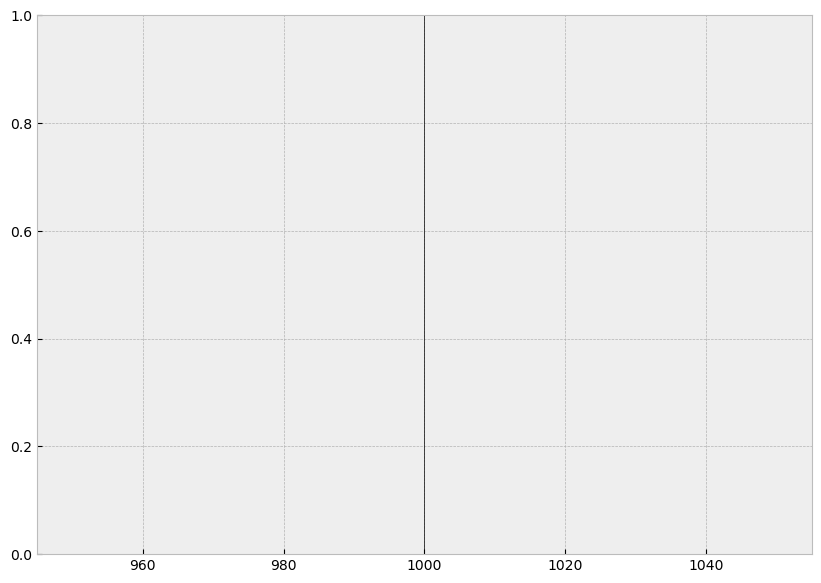

In [2]:
analysis=model.AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,10,20,30,40,50,60])
analysis.calculate_snapshifts(fibrecentre_waveref = 1 * u.micron,plot=False, reposition=True, guide_waveref=0.6 * u.micron)
analysis.compare_moffat_gaussian()

Zenith Angles Used
No Normalisation, Raw Transmission
HA used
Target goes below Horizon above/below HA of +/- 4.5h
Normalised to Target's Meridian Transmission (LHA=0h)


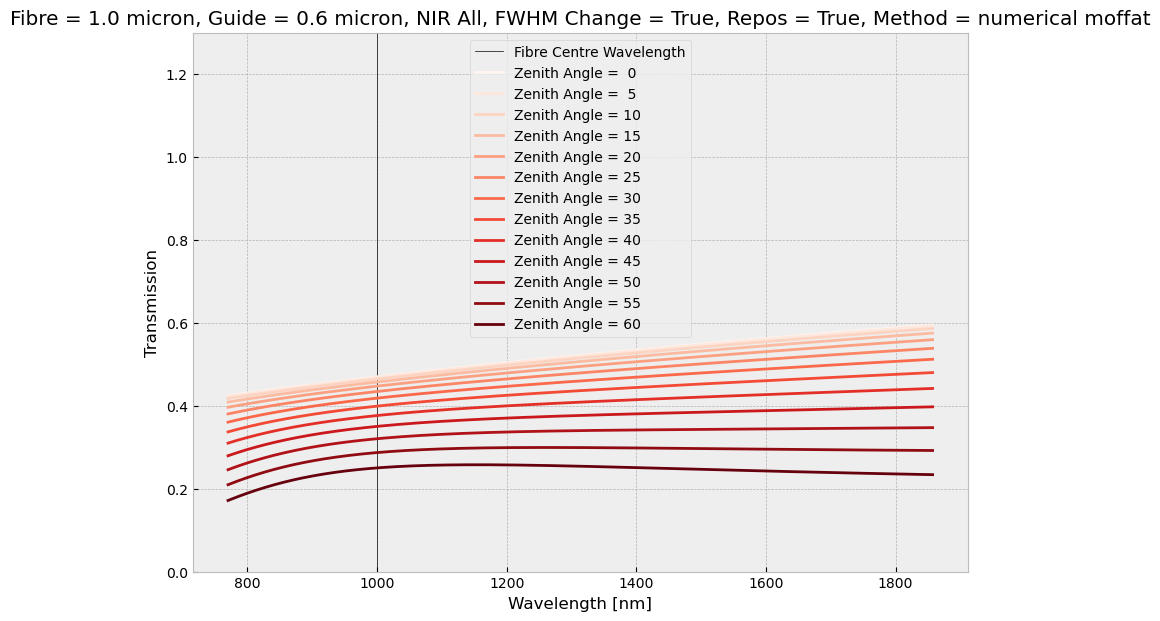

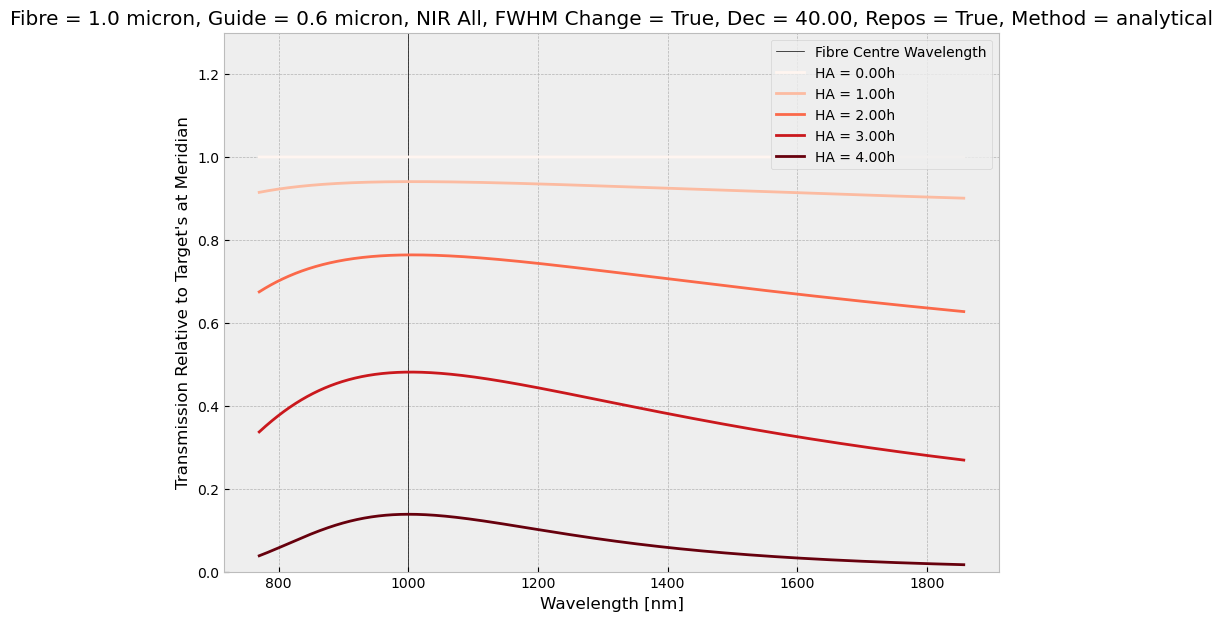

In [3]:
analysis=model.AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[0,5,10,15,20,25,30,35,40,45,50,55,60])
analysis.calculate_snapshifts(fibrecentre_waveref = 1 * u.micron,plot=False, reposition=True, guide_waveref=0.6 * u.micron)
analysis.calculate_snaptransmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="numerical moffat",scale=0.01)
analysis.plot_snaptransmissions(normalise="none")



analysis=model.AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.load_airmasses(HA_range=[0,1,2,3,4],targ_dec=40 * u.deg)
analysis.calculate_snapshifts(fibrecentre_waveref = 1 * u.micron,plot=False, reposition=True, guide_waveref=0.6 * u.micron)
analysis.calculate_snaptransmissions(k_lim=30, FWHM_change=True, kolb_factor=True, method="analytical",scale=0.01)
analysis.plot_snaptransmissions(normalise="meridian")

HA used
Target goes below Horizon above/below HA of +/- 5.7h
[34.6272     37.59315339 45.33753609 55.89851346]


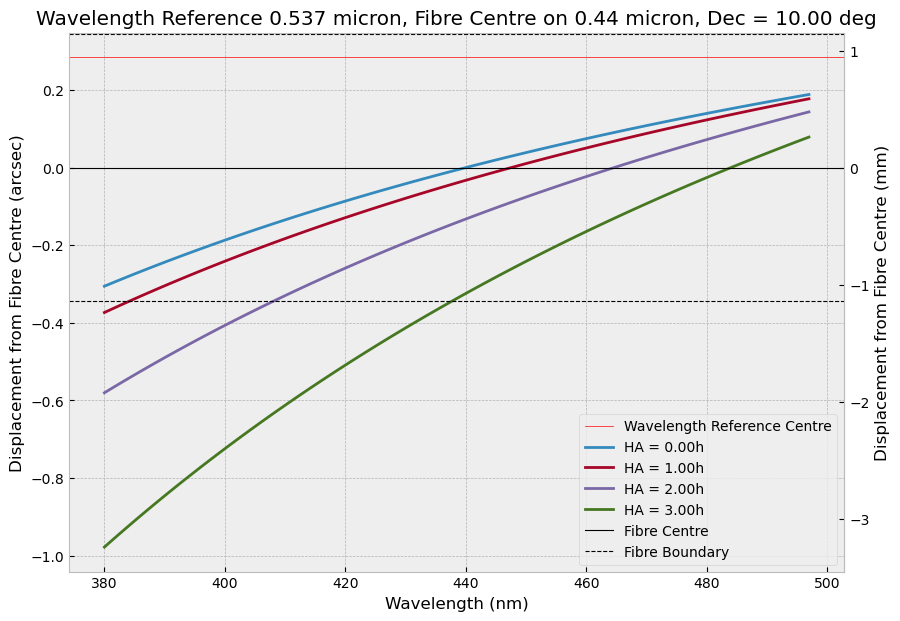

/Users/Jay.Stephan/Documents/Documents/Mosaic/ADC/ADC Code/Model_v6.py:111: RuntimeWarning: invalid value encountered in arccos
  HA = np.arccos((np.sin(alt)-np.sin(lat)*np.sin(dec))/(np.cos(lat)*np.cos(dec)))


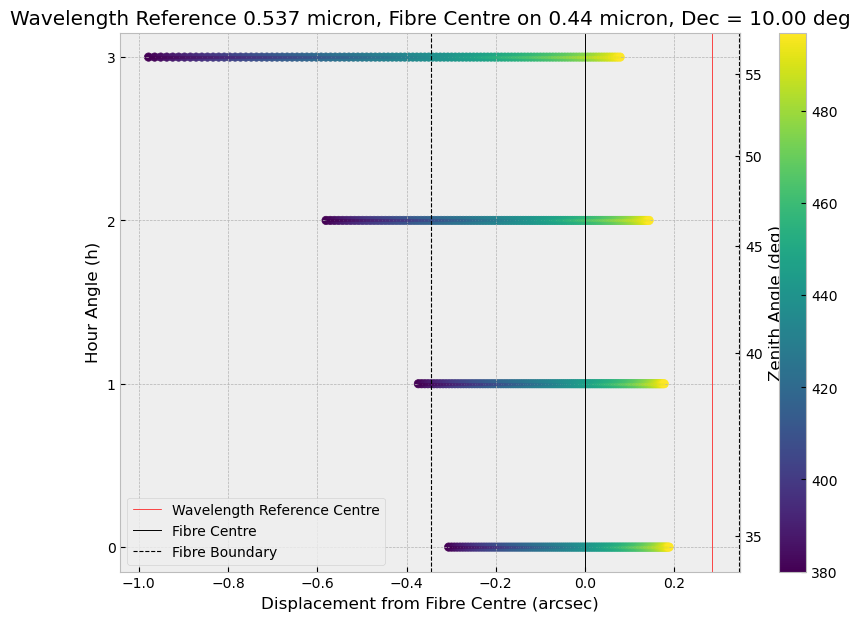

In [4]:
analysis=model.AD_analysis()
analysis.load_wave('LR','VIS','B','B',sampling=1 * u.nm)
#analysis.load_airmasses(ZA_range=[0,5,10,15,20,25,30,35,40,45,50,55,60])
analysis.load_airmasses(HA_range=[0,1,2,3],targ_dec=10 * u.deg)
analysis.calculate_snapshifts(fibrecentre_waveref = 0.44 * u.micron,plot=True, reposition=False)
#analysis.transmission_change(k_lim=30, FWHM_change=True)

Zenith Angles Used


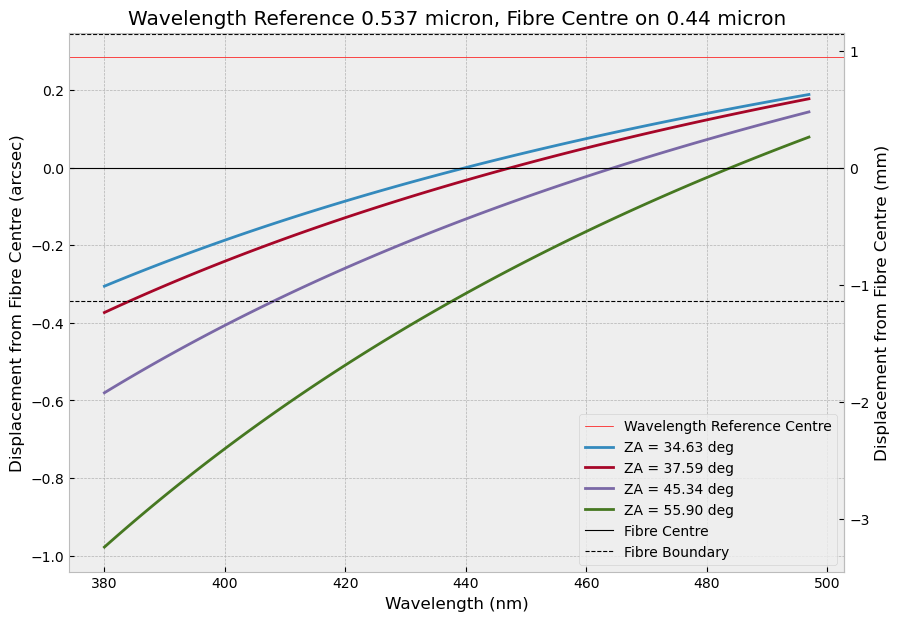

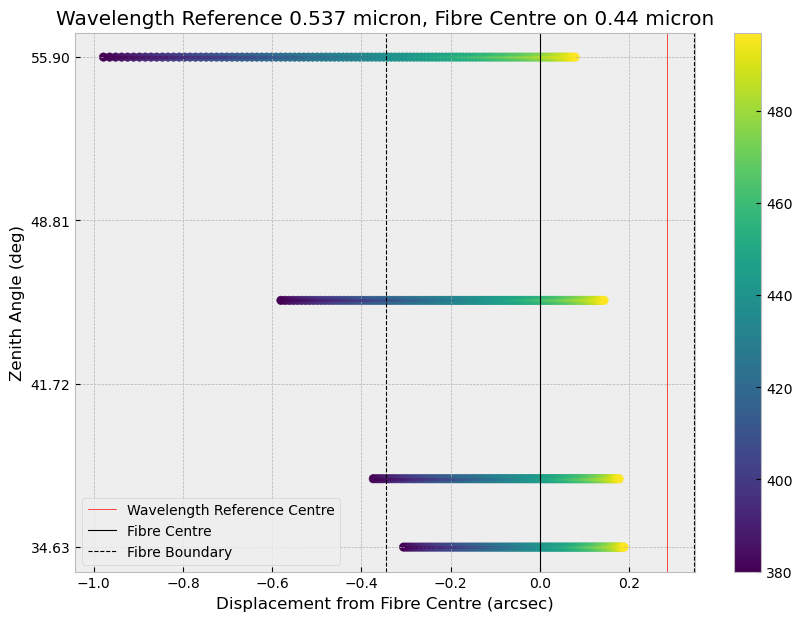

In [5]:
analysis=model.AD_analysis()
analysis.load_wave('LR','VIS','B','B',sampling=1 * u.nm)
analysis.load_airmasses(ZA_range=[34.627,     37.59315339, 45.33753609, 55.89851346])
#analysis.load_airmasses(HA_range=[0,1,2,3],targ_dec=10 * u.deg)
analysis.calculate_snapshifts(fibrecentre_waveref = 0.44 * u.micron,plot=True, reposition=False)
#analysis.transmission_change(k_lim=30, FWHM_change=True)

HA used
Target goes below Horizon above/below HA of +/- 4.5h
HA used
Target goes below Horizon above/below HA of +/- 4.5h
HA used
Target goes below Horizon above/below HA of +/- 4.5h


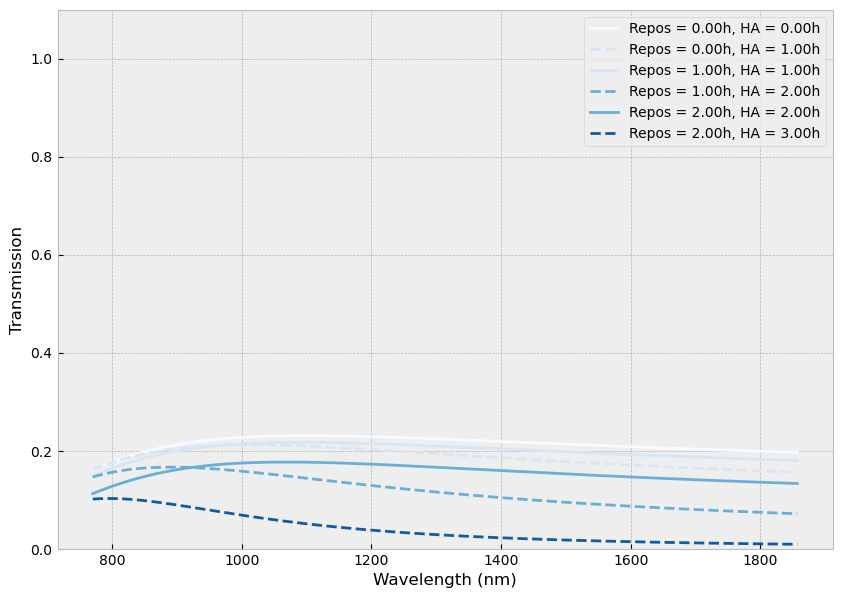

In [6]:
analysis=model.AD_analysis()
analysis.load_wave('LR','NIR','IY','H',sampling=1 * u.nm)
analysis.calculate_integtransmissions(0,3,1,2)

In [7]:
analysis=model.AD_analysis()
analysis.load_airmasses(ZA_range=np.arange(0,60))
angles=ZA_range=np.arange(0,60)

weights4 = np.arange(0, 4+1)
norm4 = mpl.colors.Normalize(vmin=min(weights4), vmax=max(weights4))
cmap4_1 = mpl.cm.ScalarMappable(norm=norm4, cmap=mpl.cm.Reds)
cmap4_2 = mpl.cm.ScalarMappable(norm=norm4, cmap=mpl.cm.Blues)
NIR_LR_all_sep=analysis.seperation_vs_zenith('LR','NIR','IY','H')
NIR_LR_H_sep=analysis.seperation_vs_zenith('LR','NIR','H','H',)
NIR_LR_IY_sep=analysis.seperation_vs_zenith('LR','NIR','IY','IY')
NIR_LR_J_sep=analysis.seperation_vs_zenith('LR','NIR','J','J')
NIR_HR_all_sep=analysis.seperation_vs_zenith('HR','NIR','IY','H')
NIR_HR_H_sep=analysis.seperation_vs_zenith('HR','NIR','H','H')
NIR_HR_IY_sep=analysis.seperation_vs_zenith('HR','NIR','IY','IY')
VIS_LR_all_sep=analysis.seperation_vs_zenith('LR','VIS','B','R')
VIS_LR_R_sep=analysis.seperation_vs_zenith('LR','VIS','R','R')
VIS_LR_V_sep=analysis.seperation_vs_zenith('LR','VIS','V','V')
VIS_LR_B_sep=analysis.seperation_vs_zenith('LR','VIS','B','B')
VIS_HR_all_sep=analysis.seperation_vs_zenith('HR','VIS','V','R')
VIS_HR_R_sep=analysis.seperation_vs_zenith('HR','VIS','R','R')
VIS_HR_V_sep=analysis.seperation_vs_zenith('HR','VIS','V','V')

Zenith Angles Used


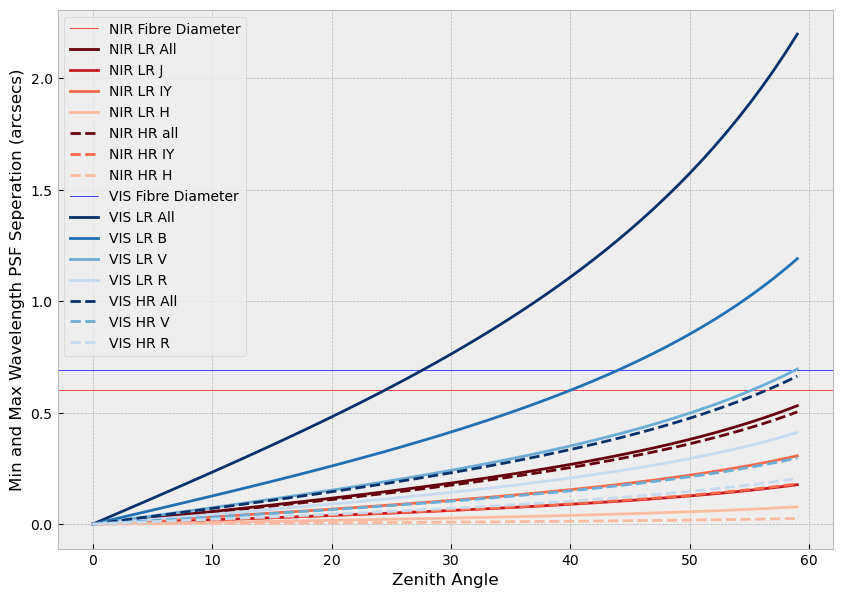

In [8]:
fig, ax = plt.subplots(figsize=(10,7))
#---------- LR NIR
plt.axhline(0.6,color='red',linewidth=0.5,label='NIR Fibre Diameter')
plt.plot(angles,NIR_LR_all_sep,label="NIR LR All",color=cmap4_1.to_rgba(3+1))
plt.plot(angles,NIR_LR_J_sep,label="NIR LR J",color=cmap4_1.to_rgba(2+1))
plt.plot(angles,NIR_LR_IY_sep,label="NIR LR IY",color=cmap4_1.to_rgba(1+1))
plt.plot(angles,NIR_LR_H_sep,label="NIR LR H",color=cmap4_1.to_rgba(0+1))
#----------- HR NIR
plt.plot(angles,NIR_HR_all_sep,label="NIR HR all",color=cmap4_1.to_rgba(3+1),linestyle='--')
plt.plot(angles,NIR_HR_IY_sep,label="NIR HR IY",color=cmap4_1.to_rgba(1+1),linestyle='--')
plt.plot(angles,NIR_HR_H_sep,label="NIR HR H",color=cmap4_1.to_rgba(0+1),linestyle='--')
#-------------- LR VIS
plt.axhline(0.69,color='blue',linewidth=0.5,label='VIS Fibre Diameter')
plt.plot(angles,VIS_LR_all_sep,label="VIS LR All",color=cmap4_2.to_rgba(3+1))
plt.plot(angles,VIS_LR_B_sep,label="VIS LR B",color=cmap4_2.to_rgba(2+1))
plt.plot(angles,VIS_LR_V_sep,label="VIS LR V",color=cmap4_2.to_rgba(1+1))
plt.plot(angles,VIS_LR_R_sep,label="VIS LR R",color=cmap4_2.to_rgba(0+1))
#-------------- HR VIS
plt.plot(angles,VIS_HR_all_sep,label="VIS HR All",color=cmap4_2.to_rgba(3+1),linestyle='--')
plt.plot(angles,VIS_HR_V_sep,label="VIS HR V",color=cmap4_2.to_rgba(1+1),linestyle='--')
plt.plot(angles,VIS_HR_R_sep,label="VIS HR R",color=cmap4_2.to_rgba(0+1),linestyle='--')
plt.ylabel("Min and Max Wavelength PSF Seperation (arcsecs)")
plt.xlabel("Zenith Angle")
plt.legend()


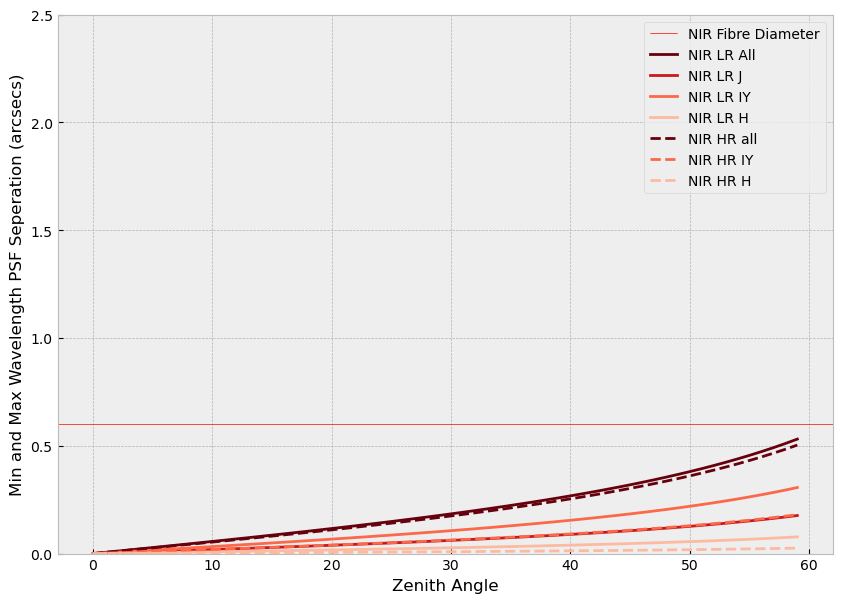

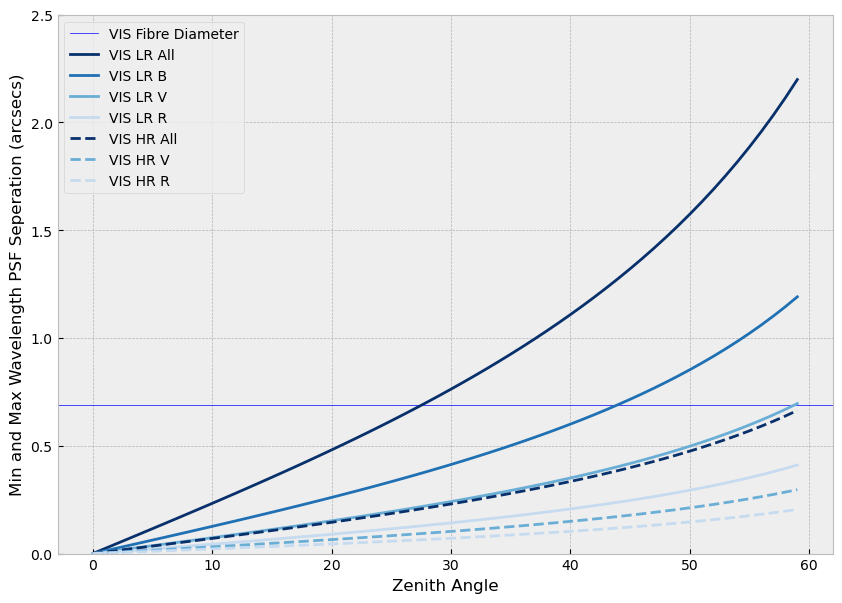

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
plt.axhline(0.6,color='red',linewidth=0.5,label='NIR Fibre Diameter')
plt.plot(angles,NIR_LR_all_sep,label="NIR LR All",color=cmap4_1.to_rgba(3+1))
plt.plot(angles,NIR_LR_J_sep,label="NIR LR J",color=cmap4_1.to_rgba(2+1))
plt.plot(angles,NIR_LR_IY_sep,label="NIR LR IY",color=cmap4_1.to_rgba(1+1))
plt.plot(angles,NIR_LR_H_sep,label="NIR LR H",color=cmap4_1.to_rgba(0+1))
plt.plot(angles,NIR_HR_all_sep,label="NIR HR all",color=cmap4_1.to_rgba(3+1),linestyle='--')
plt.plot(angles,NIR_HR_IY_sep,label="NIR HR IY",color=cmap4_1.to_rgba(1+1),linestyle='--')
plt.plot(angles,NIR_HR_H_sep,label="NIR HR H",color=cmap4_1.to_rgba(0+1),linestyle='--')
plt.ylabel("Min and Max Wavelength PSF Seperation (arcsecs)")
plt.xlabel("Zenith Angle")
plt.legend()
plt.ylim(0,2.5)

fig, ax = plt.subplots(figsize=(10,7))
plt.axhline(0.69,color='blue',linewidth=0.5,label='VIS Fibre Diameter')
plt.plot(angles,VIS_LR_all_sep,label="VIS LR All",color=cmap4_2.to_rgba(3+1))
plt.plot(angles,VIS_LR_B_sep,label="VIS LR B",color=cmap4_2.to_rgba(2+1))
plt.plot(angles,VIS_LR_V_sep,label="VIS LR V",color=cmap4_2.to_rgba(1+1))
plt.plot(angles,VIS_LR_R_sep,label="VIS LR R",color=cmap4_2.to_rgba(0+1))
plt.plot(angles,VIS_HR_all_sep,label="VIS HR All",color=cmap4_2.to_rgba(3+1),linestyle='--')
plt.plot(angles,VIS_HR_V_sep,label="VIS HR V",color=cmap4_2.to_rgba(1+1),linestyle='--')
plt.plot(angles,VIS_HR_R_sep,label="VIS HR R",color=cmap4_2.to_rgba(0+1),linestyle='--')
plt.ylim(0,2.5)
plt.ylabel("Min and Max Wavelength PSF Seperation (arcsecs)")
plt.xlabel("Zenith Angle")
plt.legend()